In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
print(os.listdir('./'))

['wowgil.csv', '.ipynb_checkpoints', 'wowwg2.csv', 'wowbgs2.csv', 'wowtk2.csv', 'wowtk.csv', 'wowbgs.csv', 'wowwg.csv', 'wowsm2.csv', 'wowsm.csv', 'wowgil2.csv', 'WoW-forecast.ipynb']


In [3]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [4]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) 
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [5]:
nRowsRead = 4000 
df1 = pd.read_csv('./wowbgs.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'wowbgs.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 3726 rows and 14 columns


In [6]:
df1.head(10)

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
0,WG,WG1,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps,NaN
1,WG,WG1,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps,NaN
2,WG,WG1,Alliance,Paladin,0,1,19,824,93879,252,NaN,1.0,heal,NaN
3,WG,WG1,Alliance,Paladin,1,2,25,7046,98599,274,NaN,1.0,heal,NaN
4,WG,WG1,Alliance,Rogue,2,3,23,65483,19629,268,NaN,1.0,dps,NaN
5,WG,WG1,Horde,Druid,4,5,12,31759,6071,531,1.0,NaN,dps,NaN
6,WG,WG1,Horde,Shaman,0,4,18,12933,94587,541,1.0,NaN,heal,NaN
7,WG,WG1,Alliance,Priest,9,5,24,123000,34687,269,NaN,1.0,dps,NaN
8,WG,WG1,Horde,Druid,2,1,9,13900,2438,523,1.0,NaN,dps,NaN
9,WG,WG1,Alliance,Priest,0,1,25,12566,36734,276,NaN,1.0,heal,NaN


In [7]:
df1.dtypes

Battleground     object
Code             object
Faction          object
Class            object
KB                int64
D                 int64
HK                int64
DD                int64
HD                int64
Honor             int64
Win             float64
Lose            float64
Rol              object
BE              float64
dtype: object

In [8]:
df1.describe()

,KB,D,HK,DD,HD,Honor,Win,Lose,BE
count,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,1889.0,1837.0,529.0
mean,3.015835,3.025497,26.420558,41215.037842,26426.688674,402.816694,1.0,1.0,1.0
std,3.141498,2.209958,15.989997,33193.413617,37583.736064,205.689061,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,1.0,1.0,1.0
25%,0.000000,1.000000,14.000000,15490.500000,5919.250000,234.000000,1.0,1.0,1.0
50%,2.000000,3.000000,25.000000,34107.500000,12070.500000,371.500000,1.0,1.0,1.0
75%,5.000000,4.000000,38.000000,58958.000000,26695.500000,529.000000,1.0,1.0,1.0
max,23.000000,12.000000,95.000000,246000.000000,325000.000000,1174.000000,1.0,1.0,1.0


In [9]:
df1.describe(include=['object', 'bool'])

,Battleground,Code,Faction,Class,Rol
count,3726,3726,3726,3726,3726
unique,9,173,2,12,2
top,WG,SA1,Horde,Shaman,dps
freq,687,30,1875,396,3000


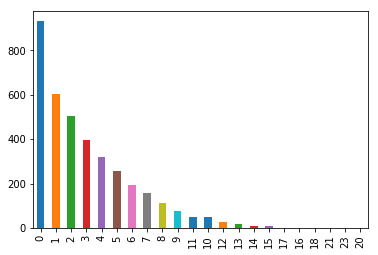

In [10]:
df1['KB'].value_counts().plot(kind='bar')
# распределение параметра KB(убийства игроков противоположной фракции, совершенная игроками)

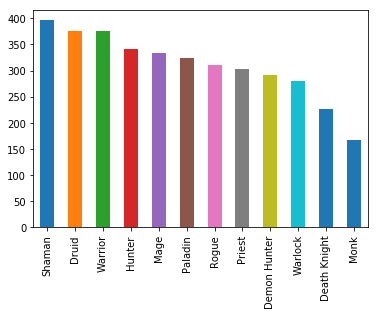

In [11]:
df1['Class'].value_counts().plot(kind='bar')
# Количество игроков, за разные классы

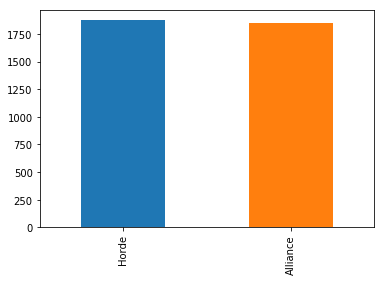

In [12]:
df1['Faction'].value_counts().plot(kind='bar')

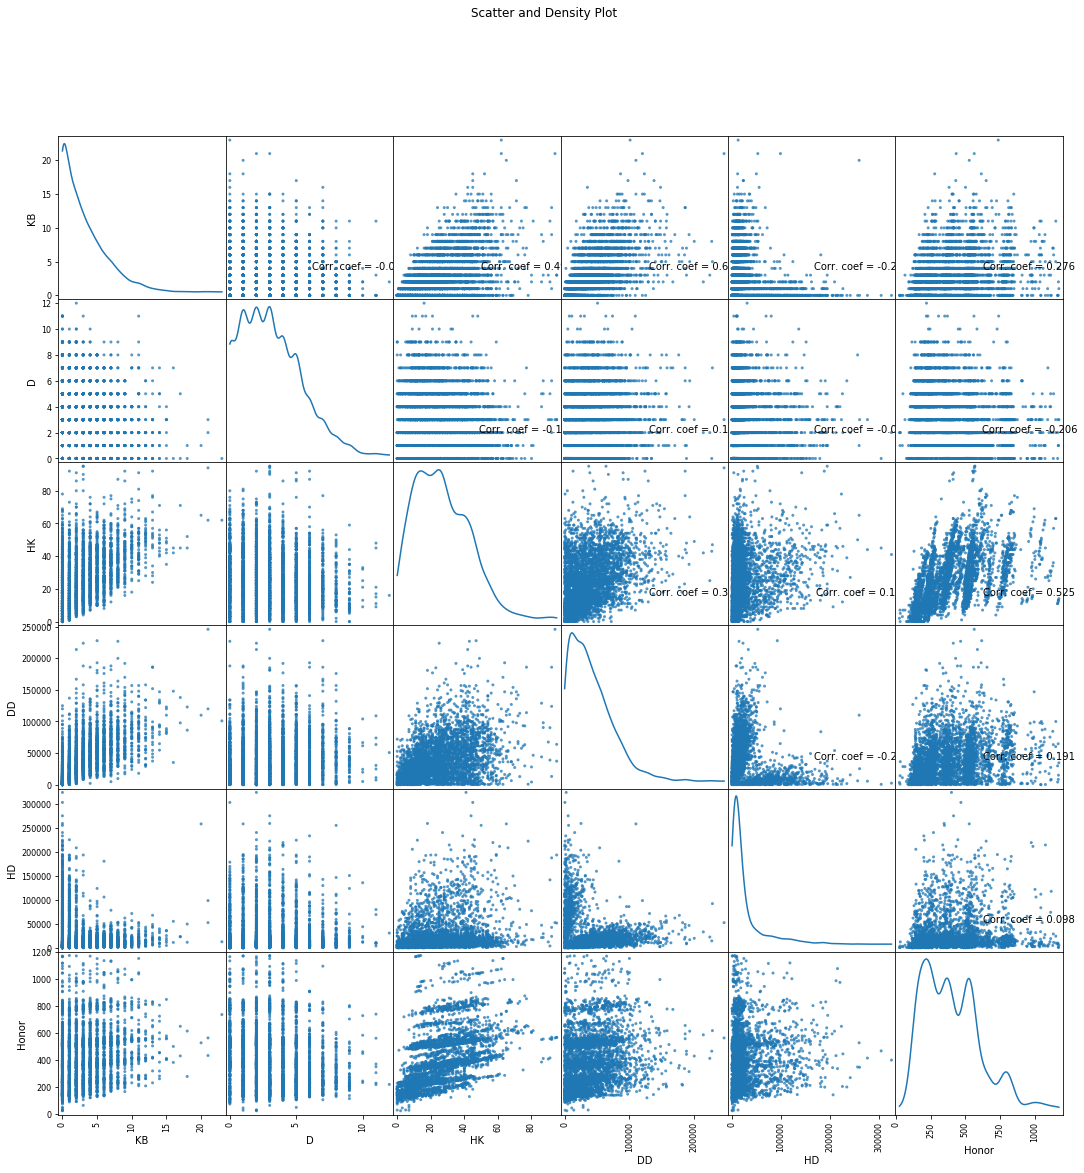

In [13]:
plotScatterMatrix(df1, 18, 10)

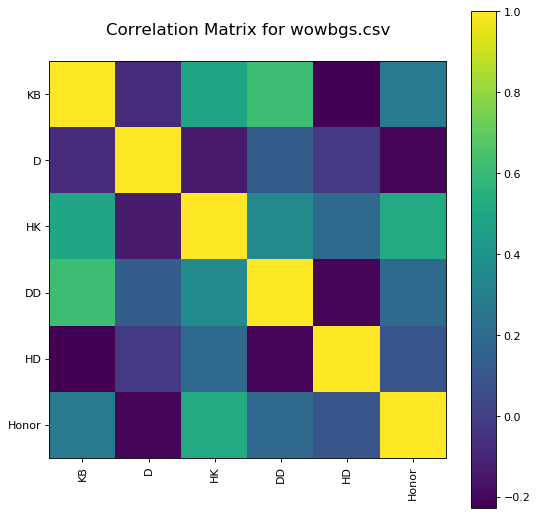

In [14]:
plotCorrelationMatrix(df1, 8)

In [15]:
pd.crosstab(df1['Faction'], df1['Class'])

Class,Death Knight,Demon Hunter,Druid,Hunter,Mage,Monk,Paladin,Priest,Rogue,Shaman,Warlock,Warrior
Faction,,,,,,,,,,,,
Alliance,105,150,225,193,178,95,180,152,149,113,125,186
Horde,122,142,151,148,156,72,144,151,161,283,155,190


In [17]:
pd.crosstab(df1['Faction'], df1['KB'])

KB,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,20,21,23
Faction,,,,,,,,,,,,,,,,,,,,,
Alliance,534,312,268,179,143,105,81,70,50,34,...,15,9,5,5,1,1,1,0,0,1
Horde,399,293,238,217,177,150,112,90,62,43,...,12,8,6,2,1,1,1,1,2,0


In [21]:
pd.crosstab(df1['Faction'], df1['Win']) 

Win,1.0
Faction,
Alliance,645
Horde,1244


In [31]:
df1.sort_values(by = ['Faction', 'Class', 'KB', 'D'], ascending=[True, True, True, False]).tail()

,Battleground,Code,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol,BE
3628,WG,WG31,Horde,Warrior,14,1,48,64805,9455,556,1.0,NaN,dps,NaN
1611,ES,ES4,Horde,Warrior,14,0,53,91140,8135,688,1.0,NaN,dps,NaN
2875,BG,BG30,Horde,Warrior,15,2,35,80974,19324,404,1.0,NaN,dps,NaN
748,TK,TK5,Horde,Warrior,15,0,56,88713,14976,413,1.0,NaN,dps,NaN
2447,TP,TP14,Horde,Warrior,18,0,45,86247,11423,279,NaN,1.0,dps,1.0
